# Class One - Lecture Two

## A Continuation

In [22]:
from prettytable import PrettyTable
import math

In [3]:
import random

def generate_test_scores(size=10):
    return [random.randint(80, 100) for _ in range(size)]

data = generate_test_scores(size=10000)

_Discrete probability:_

**Ratio of frequency of occurrence of a given value and the total frequency of occurrence of all values.** 

## Why are probabilities great?

### Set up:

Suppose we have a keeper of datasets and we want to ask about two such data sets:

The number of people alive and the number of people dead.

Ages of people alive in 1990, May 4th and Ages of people who are dead 1990, May 4th.

How many people are alive and 17? 500,000
How many people are dead and 17? 1,000,000,000,000,000

What is the probability of being alive and 17? 0.08
What is the probability of being dead and 17? 0.06

# Question One

## What is the probability a student gets a given score? 

In [21]:
unique_grades = list(set(data))
grade_freq = {}.fromkeys(unique_grades, 0)

for grade in data:
    grade_freq[grade] += 1

grade_probability = {}.fromkeys(unique_grades)
for grade in grade_freq:
    grade_probability[grade] = grade_freq[grade]/len(data)

for grade in grade_probability:
    print(grade, ":", round(grade_probability[grade], 7))

80 : 0.047
81 : 0.0461
82 : 0.0451
83 : 0.0505
84 : 0.0493
85 : 0.0484
86 : 0.0498
87 : 0.0463
88 : 0.0453
89 : 0.0466
90 : 0.0481
91 : 0.0472
92 : 0.0477
93 : 0.0481
94 : 0.0458
95 : 0.0512
96 : 0.0467
97 : 0.0472
98 : 0.047
99 : 0.0506
100 : 0.046


## For ubuntu

`sudo python -m pip install numpy`

`sudo python -m pip install matplotlib`

`sudo python -m pip install scipy`

## For Mac OSX

`python -m pip install numpy`

`python -m pip install matplotlib`

`python -m pip install scipy`


In [33]:
class Thing:
    def __init__(self, x):
        self.x = x
    def method(self):
        return self.x + 5
    
thing = Thing(7)
print("Method code", thing.method())

def func(x):
    return x+5

print("function code", func(7))

Method code 12
function code 12


In [36]:
arr = np.array([1])
listing = [1]

print("Number of methods for numpy array", len(dir(arr)))
print("Number of methods for a python list", len(dir(listing)))

print("Number of methods for numpy array", len([elem for elem in dir(arr) if "_" not in elem]))
print("Number of methods for a python list", len([elem for elem in dir(listing) if "_" not in elem]))


Number of methods for numpy array 161
Number of methods for a python list 46
Number of methods for numpy array 71
Number of methods for a python list 11


In [38]:
#help(stats.relfreq)

In [40]:
len(set(data))

21

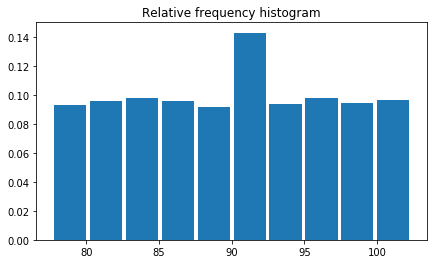

In [16]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np_data = np.array(data)
res = stats.relfreq(np_data, numbins=10)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size, res.frequency.size)

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, res.frequency, width=res.binsize)
ax.set_title('Relative frequency histogram')

plt.show()


# Question Two

## What can we do with these probabilities?

In [19]:
mean_one = sum([grade*grade_probability[grade] for grade in grade_probability])
mean_two = sum(data)/len(data)
mean_one, mean_two

(90.01579999999998, 90.0158)

In [24]:
outcome = [grade for grade in grade_probability]
probability = [grade_probability[grade] for grade in grade_probability]
p = PrettyTable(["Outcome"] + outcome[:10])
p.add_row(["Probability"] + probability[:10])
print(p)

+-------------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|   Outcome   |   80  |   81   |   82   |   83   |   84   |   85   |   86   |   87   |   88   |   89   |
+-------------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Probability | 0.047 | 0.0461 | 0.0451 | 0.0505 | 0.0493 | 0.0484 | 0.0498 | 0.0463 | 0.0453 | 0.0466 |
+-------------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+


In [25]:
outcome = [grade for grade in grade_probability]
probability = [grade_probability[grade] for grade in grade_probability]
p = PrettyTable(["Outcome"] + outcome[10:])
p.add_row(["Probability"] + probability[10:])
print(p)

+-------------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+-------+
|   Outcome   |   90   |   91   |   92   |   93   |   94   |   95   |   96   |   97   |   98  |   99   |  100  |
+-------------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+-------+
| Probability | 0.0481 | 0.0472 | 0.0477 | 0.0481 | 0.0458 | 0.0512 | 0.0467 | 0.0472 | 0.047 | 0.0506 | 0.046 |
+-------------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+-------+


# Question Three

## What are some properties of these probabilities?

In [26]:
sum(probability)

1.0

In [29]:
expected_value = sum([outcome[idx]*probability[idx] for idx in range(len(outcome))])
expected_value

90.01579999999998

In [30]:
variance = sum([math.pow(outcome[idx]-expected_value, 2)*probability[idx] for idx in range(len(outcome))])
variance

36.605150359999996

In [31]:
math.pow(variance, 0.5)

6.050219034051577